## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1.**importing** first data file "Play store data"

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Copy of Play Store Data.csv')

# **2.Some basic function for understading data**

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.shape

(10841, 13)

In [180]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# 3.Removing all NAN values from Rating column by median of rating

In [145]:
#filling all nan value in 'Rating' with average of rating values
df['Rating'].fillna(float( df['Rating'].mean()),inplace=True)


In [147]:
#rempving all  duplicate values
df1=df.drop_duplicates()

In [133]:
df['Rating'].mean()

4.207840605110369

In [135]:
df['Rating'].median()

4.3

In [148]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [149]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  int64  
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [150]:
df1['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [151]:
#removing the unwanted value
df1=df1.drop(df1.index[df1['Category']=='1.9'])

In [152]:
df1['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

# **Visualization (Category vs Apps)**

In [14]:
#ploting a bar graph for finding which category has highest share of apps
a=df1['Category'].value_counts()

Text(0, 0.5, 'number')

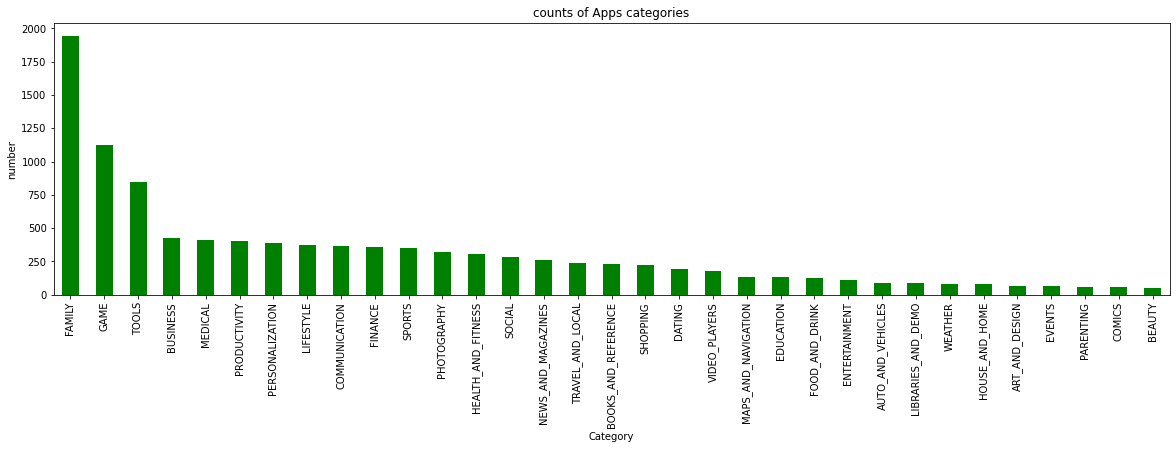

In [72]:
category_bar=a.plot.bar(figsize=(20,5),color='g')
category_bar.set_title('counts of Apps categories')
category_bar.set_xlabel('Category')
category_bar.set_ylabel('number')

# **visualization(Apps vs Rating)**

Text(0.5, 0, 'Rating')

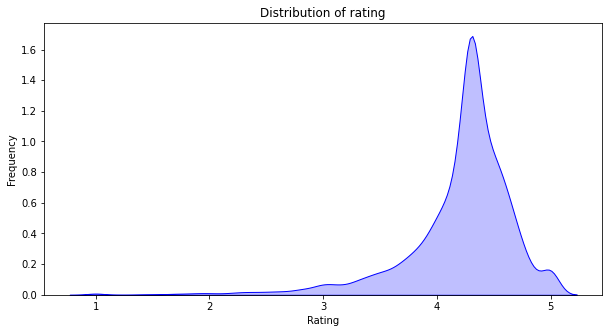

In [153]:
#finding distribution of rating
plt.figure(figsize=(10,5)) 
b= sns.kdeplot(df1.Rating,color='b',shade=True)
b.set_title('Distribution of rating')
b.set_ylabel('Frequency')
b.set_xlabel('Rating')

Text(0.5, 1.0, 'average of Ratings')

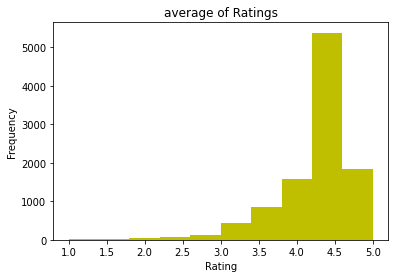

In [114]:
#finding average rating 
plt.hist(rating.values,color='y')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('average of Ratings')

## (Category vs Install)

In [57]:
df1['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10357, dtype: float64

In [59]:
df1['Installs'] = df1['Installs'].apply(lambda x : str(x).replace('+','') if '+' in str(x) else str(x))
df1['Installs'] = df1['Installs'].apply(lambda x : str(x).replace(',','') if ',' in str(x) else str(x))
df1['Installs'] = df1['Installs'].apply(lambda x : float(x))

In [104]:
#grouping avg install for each Category of apps
df_install=df1.groupby(['Category'])['Installs'].mean()

Text(0, 0.5, 'Installs')

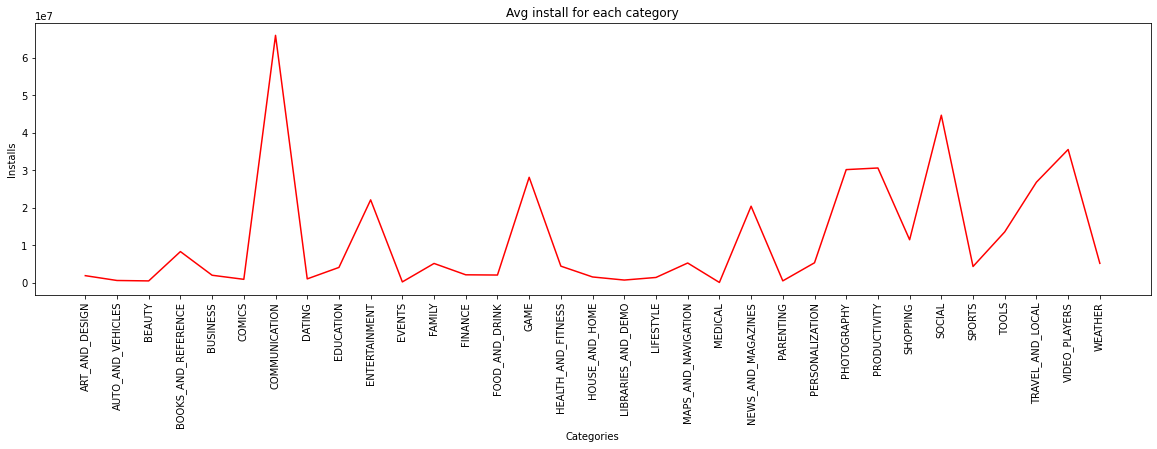

In [105]:
#finding which Category has maximum app install
plt.figure(figsize=(20,5))
plt.plot(df_install, color='r')
plt.xticks(rotation=90)
plt.title('Avg install for each category')
plt.xlabel('Categories')
plt.ylabel('Installs')

# finding which type app have more rating(Free vs Paid)

In [19]:
#grouping rating and type(Free and Paid)
rating_free_paid=df1.groupby(['Rating'])['Type'].value_counts().unstack()

Text(0, 0.5, 'counts of type')

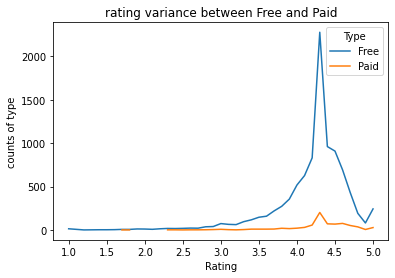

In [20]:
#comparing using multiline graph
rating_free_paid.plot()
plt.title('rating variance between Free and Paid')
plt.xlabel('Rating')
plt.ylabel('counts of type')

# finding which App Category have maximum average reviews

In [43]:
#replacing object type value in int
df['Reviews']=df['Reviews'].replace('3.0M',3000000)

In [42]:
#finding which app gets maximum reviews
#converting Reviews to integer data type
df['Reviews']=df['Reviews'].astype(int)

Text(0.5, 0, 'Category')

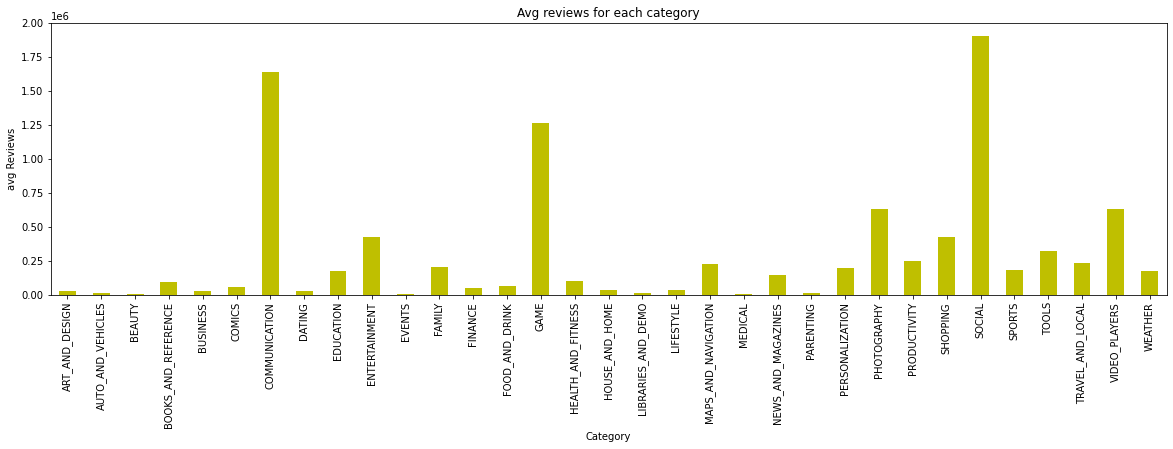

In [159]:
#Average rating for each category
avg_rating =df1.groupby(['Category'])['Reviews'].mean()
b=avg_rating.plot.bar(figsize=(20,5),color='y')
b.set_title('Avg reviews for each category')
b.set_ylabel('avg Reviews')
b.set_xlabel('Category')

# finding top 10 genres of apps

In [163]:
df1['Genres'].unique()


array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [219]:
x=df['Genres'].value_counts().reset_index()[:10]
x.rename(columns={'index':'Genres','Genres':'Index'},inplace=True)
y=df1['Genres'].value_counts().reset_index()[:10]
y.rename(columns={'index':'Genres','Genres':'Index'},inplace=True)

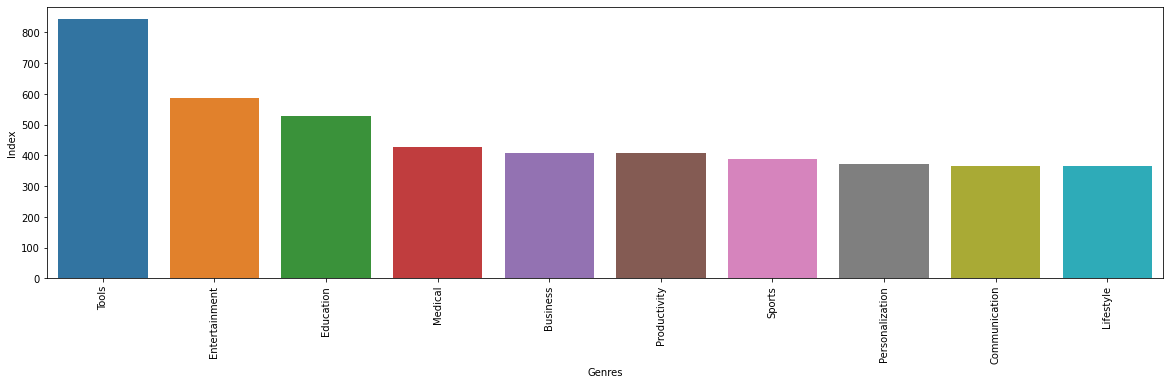

In [220]:
plt.figure(figsize=(20,5))
fig=sns.barplot(x=x['Genres'],y=y['Index']);
plt.xticks(rotation=90);

# **count of apps for each age group(content rating)**

In [194]:
df1['Content Rating']

0          Everyone
1          Everyone
2          Everyone
3              Teen
4          Everyone
            ...    
10836      Everyone
10837      Everyone
10838      Everyone
10839    Mature 17+
10840      Everyone
Name: Content Rating, Length: 10357, dtype: object

In [ ]:
e=df1['Content Rating']

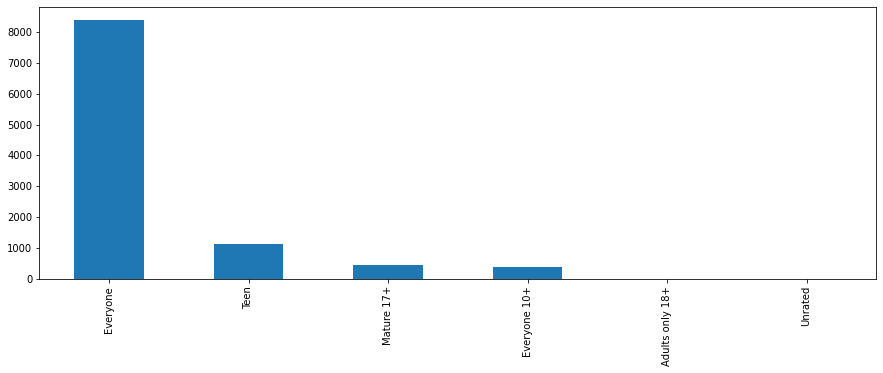

In [197]:
#app for different age group
d=df1['Content Rating'].value_counts().plot.bar(figsize=(15,5))


In [227]:
df1['Price'] = df1['Price'].apply(lambda x : str(x).replace('$','') if '$' in str(x) else str(x))
df1['Price'] = df1['Price'].apply(lambda x : float(x))

In [ ]:
paid_apps=df1.groupby(['Price'])

In [29]:
#importing user Review file
df_review=pd.read_csv('/content/drive/MyDrive/Copy of User Reviews.csv')

In [30]:
df_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
